# Project Name


 Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce


# Project type   
- Unsupervised Learning
- Exploratory Data Analysis (EDA)
- Recommendation System



# Contribution
Individual

# Project summary

The global e-commerce industry generates a massive volume of transaction data daily, presenting an invaluable opportunity for businesses to understand customer behaviors, optimize marketing strategies, and boost revenue. The Shopper Spectrum project addresses this challenge by analyzing transaction data from an online retailer to derive meaningful customer segments and recommend products most relevant to individual users.

The project addresses two core business needs:

- Segmenting customers based on purchasing behavior to enable personalized engagement.

- Recommending products to customers to improve user experience and increase sales.

📊 Dataset and Preprocessing
The dataset used for this project consists of online retail transactions from 2022–2023, including information such as Invoice Number, Product Code, Description, Quantity, Unit Price, Customer ID, Invoice Date, and Country. Preprocessing involved:

- Removing entries with missing CustomerID

- Filtering out canceled transactions (InvoiceNo starting with ‘C’)

- Excluding records with zero or negative quantities and prices

These steps ensured that the data was clean, reliable, and ready for meaningful analysis.

📈 Exploratory Data Analysis (EDA)
Exploratory Data Analysis was performed to understand overall purchasing patterns. Key insights included:

- Most transactions came from a few top countries

- Certain products were consistently top sellers

- Spending patterns varied over time, with visible peaks and seasonal trends

These visualizations provided the context required for building more advanced models.

🧠 RFM Analysis and Clustering
The heart of customer segmentation lies in RFM analysis:

- Recency: How recently a customer made a purchase

- Frequency: How often they made purchases

- Monetary: How much they spent in total

These features were calculated for each customer, then normalized using StandardScaler. KMeans clustering was applied to group customers into behavior-based segments. The Elbow Method and Silhouette Score were used to determine the optimal number of clusters.

Each cluster was labeled based on average RFM values:

🟢 High-Value: Frequent, recent buyers with high spending

🟡 Regular: Moderately active customers

🔵 Occasional: Infrequent, low-spending customers

🔴 At-Risk: Haven’t purchased in a long time

This segmentation helps businesses tailor retention campaigns, loyalty programs, and marketing strategies more effectively.

🤖 Product Recommendation System
In parallel, a collaborative filtering-based recommendation system was developed. A Customer × Product matrix was constructed, and cosine similarity was used to compute similarity between products based on co-purchase behavior. When a user selects a product, the system returns the top 5 most similar products. This technique enhances product discoverability and cross-selling opportunities.

🌐 Streamlit Web Application
To make the project interactive and user-friendly, a Streamlit app was developed with two main modules:

- Product Recommendation Module – Takes a product code as input and suggests 5 similar products using the cosine similarity matrix.

- Customer Segmentation Module – Accepts Recency, Frequency, and Monetary inputs from the user and predicts the customer segment using the trained clustering model.

The app features a clean UI, real-time interaction, and helpful sidebar instructions.

💼 Real-World Applications
-Targeted marketing campaigns based on customer segments

-Personalized product suggestions for better user experience

-Inventory planning based on product demand insights

-Early identification of at-risk customers for retention strategies

🧩 Conclusion

Shopper Spectrum is a comprehensive solution that combines data cleaning, unsupervised learning, recommendation systems, and app development into one practical business tool. It showcases the power of machine learning in solving real-world retail problems and highlights the impact of data-driven decision-making in e-commerce.

# Github link
https://github.com/suji-312

# Problem statement
The global e-commerce industry generates vast amounts of transaction data daily, offering valuable insights into customer purchasing behaviors. Analyzing this data is essential for identifying meaningful customer segments and recommending relevant products to enhance customer experience and drive business growth. This project aims to examine transaction data from an online retail business to uncover patterns in customer purchase behavior, segment customers based on Recency, Frequency, and Monetary (RFM) analysis, and develop a product recommendation system using collaborative filtering techniques.

In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\kamal\Downloads\online_retail.csv")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Look at first few rows
print(df.head())

# Check info
print(df.info())

# Check for missing values
print(df.isnull().sum())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2022-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2022-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       ------------

In [4]:
# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Remove canceled invoices
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Remove negative or zero Quantity and UnitPrice
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

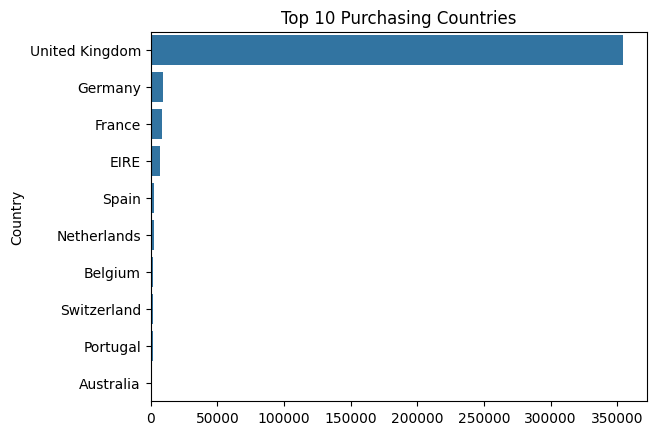

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 countries by purchase
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Purchasing Countries')
plt.show()

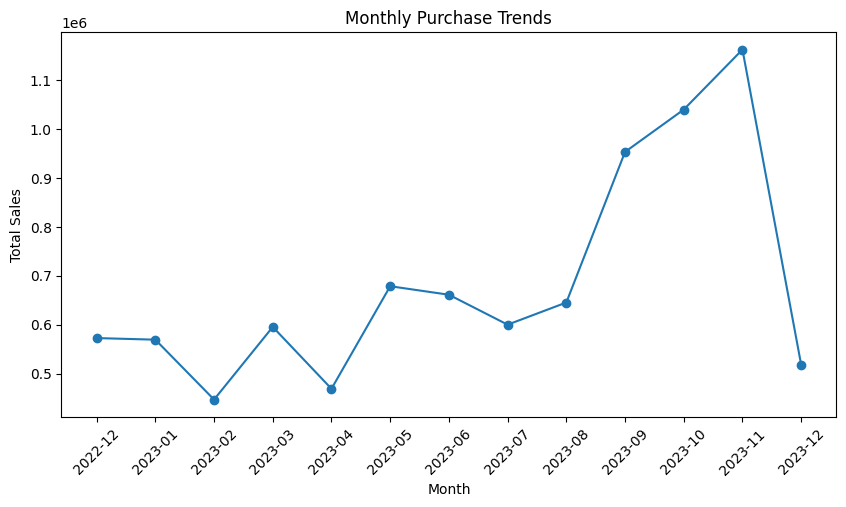

In [6]:
# Convert InvoiceDate to date for grouping
# Calculate TotalPrice if not present
if 'TotalPrice' not in df.columns:
    df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# Monthly sales trend
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum()

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o')
plt.title('Monthly Purchase Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


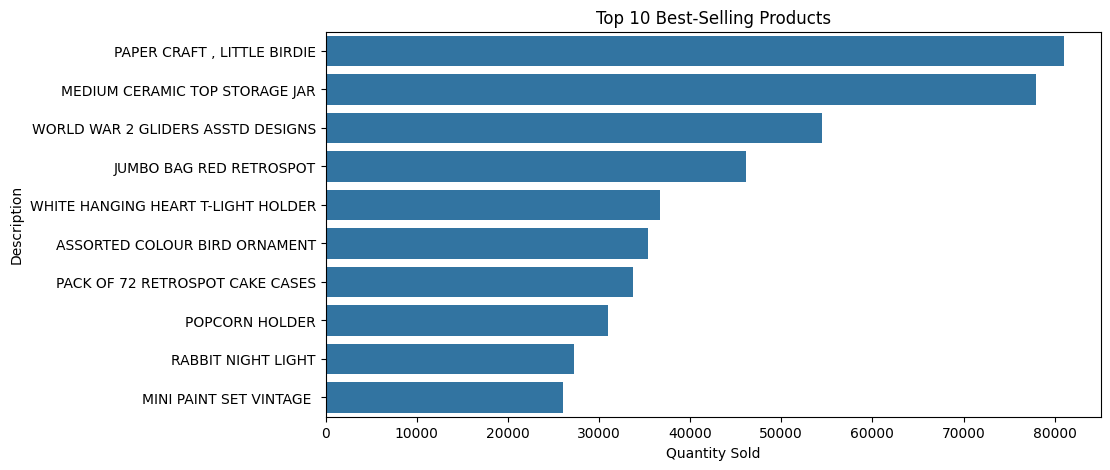

In [7]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Quantity Sold')
plt.show()


In [8]:
import pandas as pd
import datetime as dt

# Convert InvoiceDate to datetime 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Create a new column for total spending per row
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Reference date = most recent date in dataset
latest_date = df['InvoiceDate'].max()

# Perform RFM calculation
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                 # Frequency
    'TotalPrice': 'sum'                                     # Monetary
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Show the first few rows
print(rfm.head())



            Recency  Frequency  Monetary
CustomerID                              
12346.0         325          1  77183.60
12347.0           1          7   4310.00
12348.0          74          4   1797.24
12349.0          18          1   1757.55
12350.0         309          1    334.40


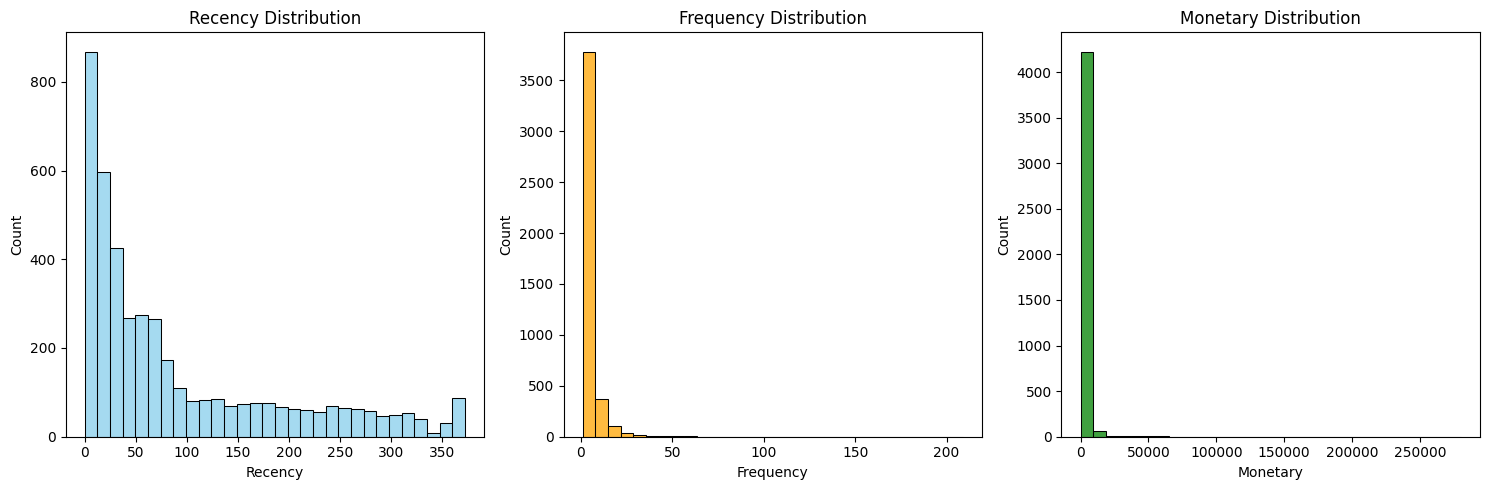

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(rfm['Recency'], bins=30, ax=axes[0], color='skyblue')
axes[0].set_title('Recency Distribution')

sns.histplot(rfm['Frequency'], bins=30, ax=axes[1], color='orange')
axes[1].set_title('Frequency Distribution')

sns.histplot(rfm['Monetary'], bins=30, ax=axes[2], color='green')
axes[2].set_title('Monetary Distribution')

plt.tight_layout()
plt.show()

C:\Users\kamal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kamal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kamal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kamal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

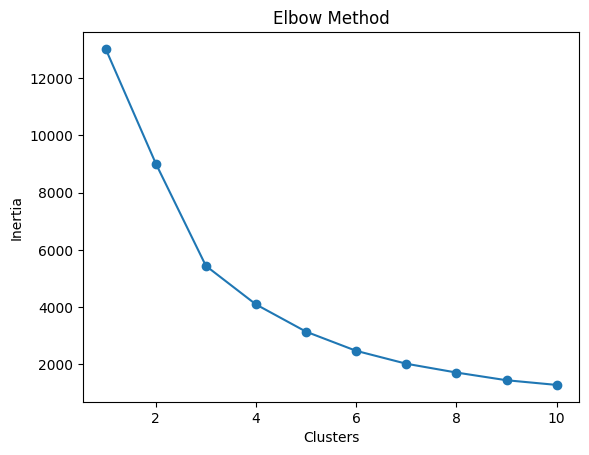

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Normalize
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()


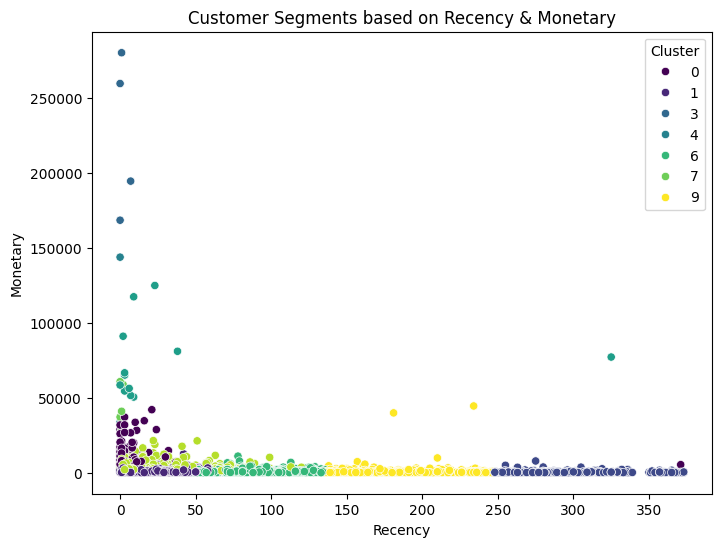

In [11]:
rfm['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', palette='viridis', data=rfm)
plt.title('Customer Segments based on Recency & Monetary')
plt.show()


In [12]:
cluster_summary = rfm.groupby('Cluster').mean()
cluster_summary['Count'] = rfm['Cluster'].value_counts()
print(cluster_summary)


            Recency   Frequency       Monetary  Count
Cluster                                              
0         10.000000   26.312500   12874.864062     96
1         22.280124    3.068944    1064.923920   1610
2        306.761905    1.279762     400.727996    504
3          2.000000   45.250000  225721.652500      4
4          0.000000  205.000000   88772.395000      2
5         33.153846   34.000000   73826.107692     13
6         83.219689    2.211399     854.291536    965
7          1.000000   87.142857   35600.392857      7
8         18.451128   10.355263    4142.619436    532
9        190.209917    1.874380     729.401836    605


In [13]:
from sklearn.metrics.pairwise import cosine_similarity

# Create matrix
product_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)

# Calculate cosine similarity
similarity = cosine_similarity(product_matrix.T)

# Convert to DataFrame
import numpy as np
sim_df = pd.DataFrame(similarity, index=product_matrix.columns, columns=product_matrix.columns)

# Recommend function
def recommend_products(product_id):
    return sim_df[product_id].sort_values(ascending=False)[1:6]

In [14]:
sample_product = '84029E'
print("Top 5 recommendations for product:", sample_product)
print(recommend_products(sample_product))


Top 5 recommendations for product: 84029E
StockCode
82615     0.774201
35004C    0.667486
21107     0.636046
22611     0.624211
22095     0.534144
Name: 84029E, dtype: float64


In [15]:

import pickle

# Save the scaler used for RFM
pickle.dump(scaler, open("scaler.pkl", "wb"))

# Save the trained KMeans model
pickle.dump(kmeans, open("rfm_model.pkl", "wb"))

# Save the product similarity matrix
pickle.dump(sim_df.values, open("similarity_matrix.pkl", "wb"))

# Save product names list
pickle.dump(list(sim_df.columns), open("product_names.pkl", "wb"))


In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import pickle


# Build product matrix
product_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)

# Compute similarity
similarity = cosine_similarity(product_matrix.T)
sim_df = pd.DataFrame(similarity, index=product_matrix.columns, columns=product_matrix.columns)

# Calculate RFM
latest_date = df['InvoiceDate'].max()
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'UnitPrice': lambda x: (x * df.loc[x.index, 'Quantity']).sum()
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Scale and cluster
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled)

# Saving locally
with open("similarity_matrix.pkl", "wb") as f:
    pickle.dump(sim_df.values, f)

with open("product_names.pkl", "wb") as f:
    pickle.dump(list(sim_df.columns), f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("rfm_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)


C:\Users\kamal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
# Create customer-product matrix
product_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)

# Create similarity matrix
similarity = cosine_similarity(product_matrix.T)

# Wrap into DataFrame
sim_df = pd.DataFrame(similarity, index=product_matrix.columns, columns=product_matrix.columns)


In [20]:
import numpy as np

# sim_df should be your cosine similarity DataFrame
np.save("similarity_matrix.npy", sim_df.values)


In [21]:
import pandas as pd
import pickle

# Load your dataset
df = pd.read_csv("online_retail.csv")

# Create mapping: StockCode → Description
product_mapping = df.dropna(subset=['StockCode', 'Description']) \
                    .drop_duplicates(subset=['StockCode']) \
                    .set_index('StockCode')['Description'] \
                    .to_dict()

# Save as pickle
with open("product_mapping.pkl", "wb") as f:
    pickle.dump(product_mapping, f)

print(" product_mapping.pkl created successfully!")


 product_mapping.pkl created successfully!
